In [ ]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
import kagglehub
path = kagglehub.dataset_download("fournierp/captcha-version-2-images")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/captcha-version-2-images


In [ ]:
path1 = '/kaggle/input/captcha-version-2-images/samples/25257.png'

In [ ]:
def plot_ (img1) :
    plt.figure(figsize = (20,5))
    plt.imshow(img1, 'gray')
    plt.axis('off')
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)

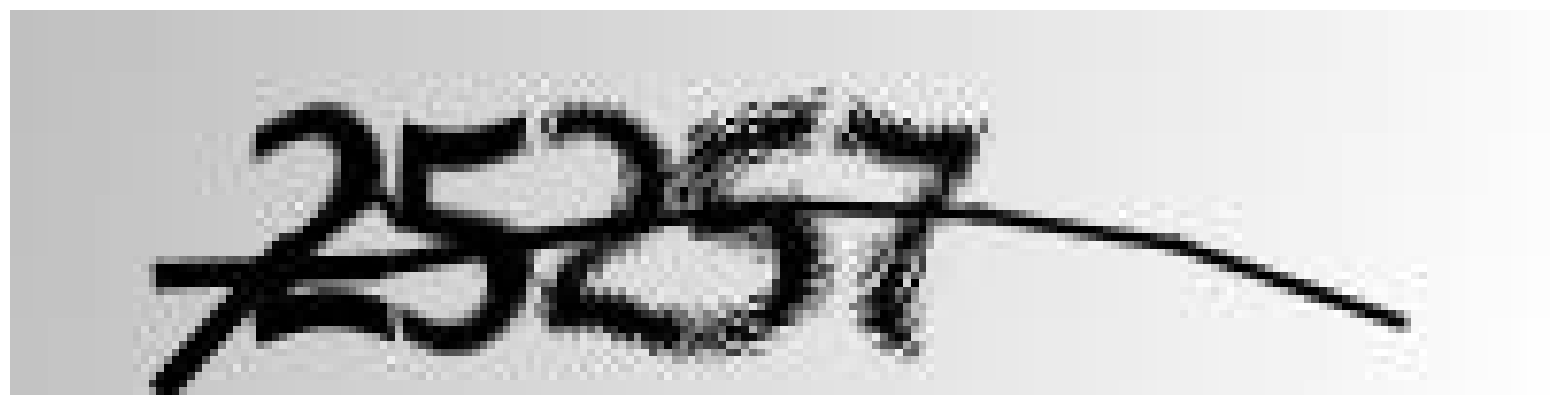

In [ ]:
plot_(img1)

Adaptive Threshold

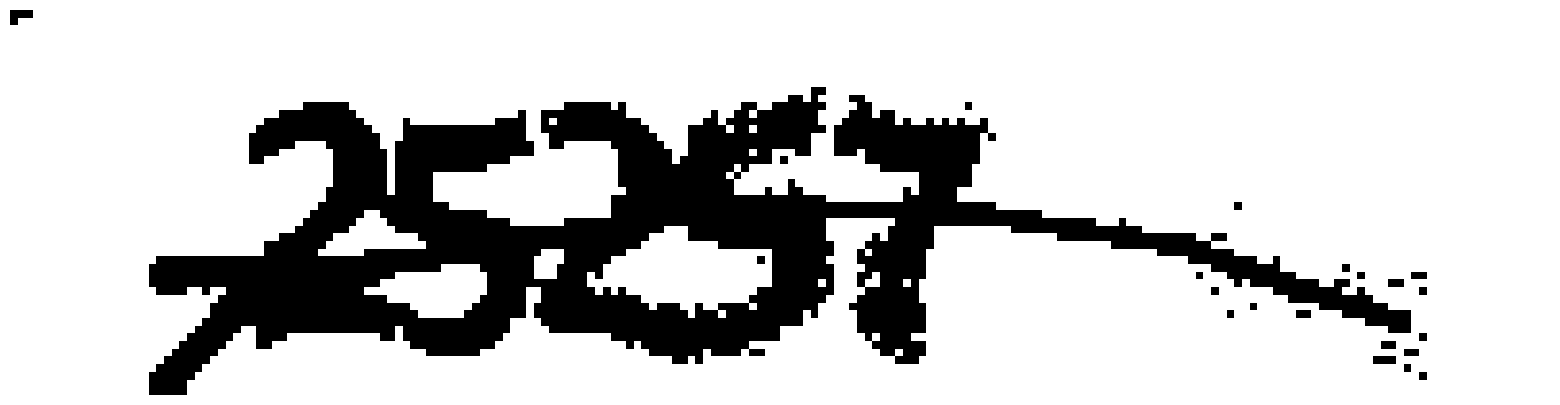

In [ ]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
plot_(thresh_img1)

Closing(dialation followed by erosion)

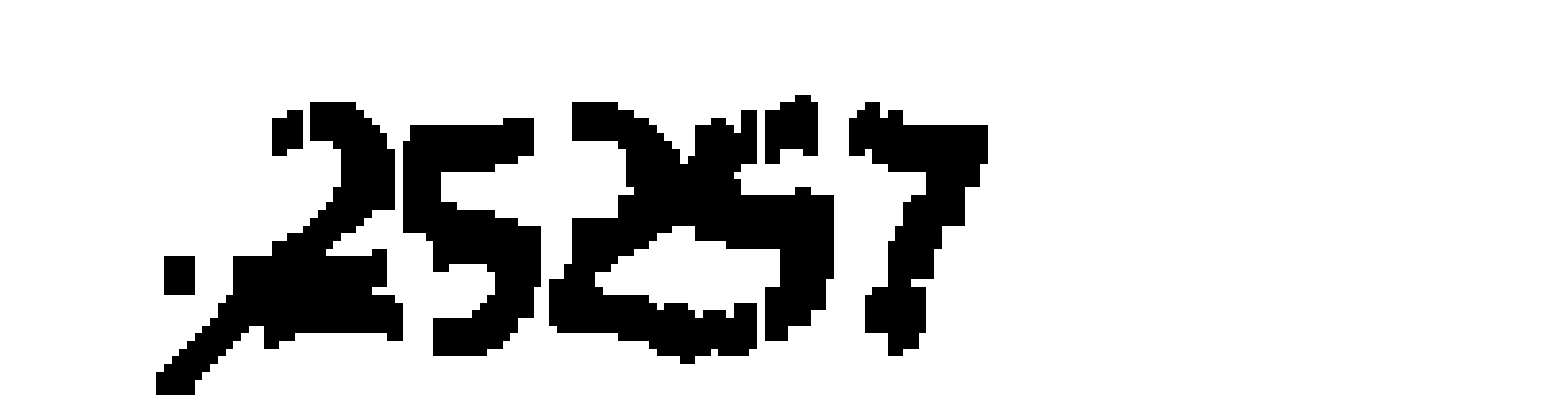

In [ ]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
plot_(close_img1)

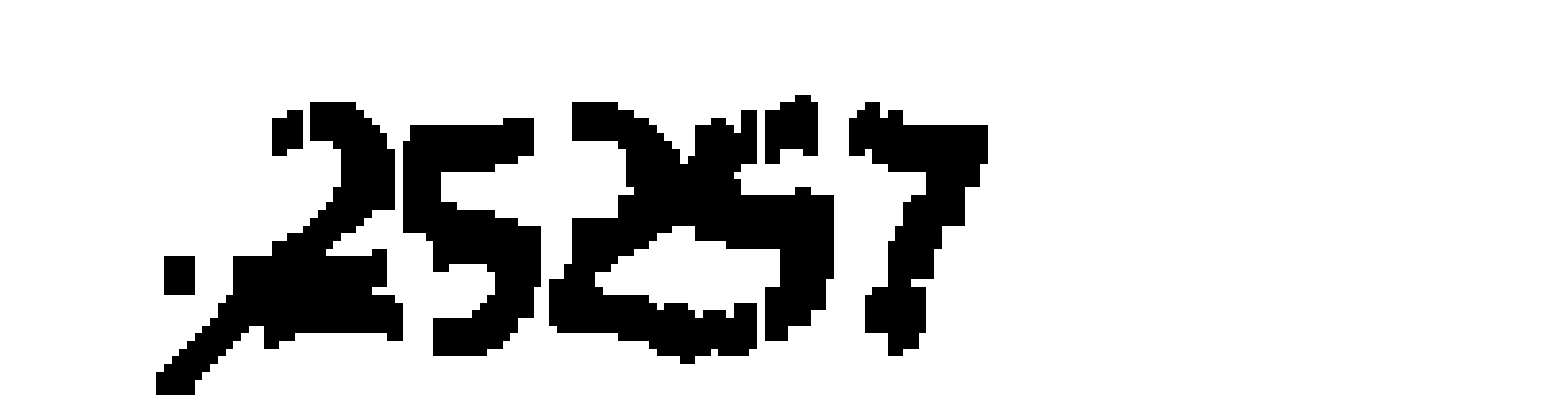

In [ ]:
gauss_img1 = cv2.GaussianBlur(close_img1, (1,1), 0)
plot_(gauss_img1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
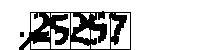

In [ ]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

In [ ]:
path = '/kaggle/input/captcha-version-2-images/samples/samples'

In [ ]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)


In [ ]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator


In [ ]:
X = []
y = []
for image in os.listdir(path) :
    if image[6:] != 'png' :
        continue
    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    img = t_img(img)
    img = c_img(img)
    img = b_img(img)
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


[]

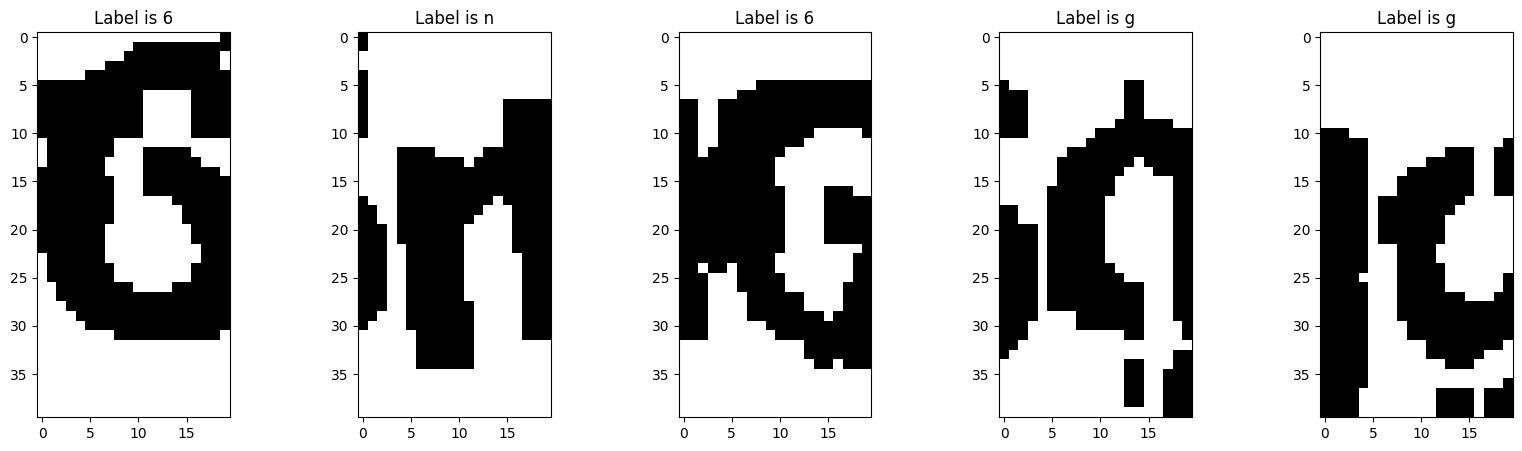

In [ ]:
X /= 255.0
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [ ]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of e : 235
Occurance count of 3 : 267
Occurance count of 6 : 259
Occurance count of b : 240
Occurance count of 7 : 258
Occurance count of m : 275
Occurance count of p : 253
Occurance count of y : 232
Occurance count of n : 525
Occurance count of f : 271
Occurance count of x : 264
Occurance count of 2 : 265
Occurance count of 8 : 264
Occurance count of w : 235
Occurance count of c : 262
Occurance count of 4 : 284
Occurance count of 5 : 281
Occurance count of d : 259
Occurance count of g : 271


One Hot Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse_output=False).fit_transform(y_combine.reshape(len(y_combine), 1))



MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Input
from sklearn.model_selection import train_test_split

In [ ]:
print(X.shape)
print(y_one_hot.shape)

(5200, 40, 20, 1)
(5200, 19)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4160, 40, 20, 1)
(4160, 19)
(1040, 40, 20, 1)
(1040, 19)


In [ ]:
def conv_layer (filter) :
    model = Sequential()
    model.add(Conv2D(filter, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    return model
def dens_layer (hidden) :
    model = Sequential()
    model.add(Dense(hidden, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    return model
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    model.add(Dense(19, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

DATA AUG

In [ ]:
X_train = np.reshape(X_train, (4160, 40*20*1))

SMOTE: This imports the SMOTE class from the imblearn library. SMOTE stands for Synthetic Minority Over-sampling Technique, which is used to handle class imbalance in classification tasks by generating synthetic samples.

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7866, 800)
(7866, 19)


In [ ]:
X_train = np.reshape(X_train, (7866, 40, 20, 1))

In [ ]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)
train_set = traingen.flow(X_train, y_train)
trainX, trainy = next(train_set)

In [ ]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 20, 10, 128)    │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 10, 5, 32)      │        37,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 5, 3, 16)       │         4,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 32)             │         7,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 32)             │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 19)             │           627 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,155 (207.64 KB)

 Trainable params: 52,675 (205.76 KB)

 Non-trainable params: 480 (1.88 KB)

Model Checkpoints


In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [ ]:
history = model.fit(
    traingen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=150,
    steps_per_epoch=len(X_train) // 32,
    callbacks=[checkp]
)


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1694 - loss: 2.8666
Epoch 1: val_loss improved from inf to 2.66899, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.1718 - loss: 2.8579 - val_accuracy: 0.2385 - val_loss: 2.6690
Epoch 2/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 1.9058

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 2.66899 to 2.66424, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.4375 - loss: 1.9058 - val_accuracy: 0.2394 - val_loss: 2.6642
Epoch 3/150
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5516 - loss: 1.5500
Epoch 3: val_loss improved from 2.66424 to 1.63259, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5525 - loss: 1.5476 - val_accuracy: 0.5394 - val_loss: 1.6326
Epoch 4/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875 - loss: 1.0051
Epoch 4: val_loss improved from 1.63259 to 1.61117, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.6875 - loss: 1.0051 - val_accuracy: 0.5500 - val_loss: 1.6112
Epoch 5/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7015 - loss: 1.0740
Epoch 5: val_loss improved from 1.61117 to 0.85989, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7017 - loss: 1.0734 - val_accuracy: 0.7740 - val_loss: 0.8599
Epoch 6/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8125 - loss: 0.5859
Epoch 6: val_loss improved from 0.85989 to 0.85727, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.5859 - val_accuracy: 0.7750 - val_loss: 0.8573
Epoch 7/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7710 - loss: 0.8450
Epoch 7: val_loss improved from 0.85727 to 0.72731, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7711 - loss: 0.8446 - val_accuracy: 0.8192 - val_loss: 0.7273
Epoch 8/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7500 - loss: 0.7696
Epoch 8: val_loss did not improve from 0.72731
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.7500 - loss: 0.7696 - val_accuracy: 0.8202 - val_loss: 0.7284
Epoch 9/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7979 - loss: 0.7357
Epoch 9: val_loss improved from 0.72731 to 0.69788, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7979 - loss: 0.7355 - val_accuracy: 0.8269 - val_loss: 0.6979
Epoch 10/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7188 - loss: 0.7541
Epoch 10: val_loss improved from 0.69788 to 0.69508, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7188 - loss: 0.7541 - val_accuracy: 0.8260 - val_loss: 0.6951
Epoch 11/150
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8217 - loss: 0.6315
Epoch 11: val_loss did not improve from 0.69508
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8217 - loss: 0.6316 - val_accuracy: 0.8087 - val_loss: 0.7000
Epoch 12/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7188 - loss: 1.2569
Epoch 12: val_loss did not improve from 0.69508
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.7188 - loss: 1.2569 - val_accuracy: 0.8106 - val_loss: 0.7015
Epoch 13/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8272 - loss: 0.6083
Epoch 13: val_loss improved from 0.69508 to 0.58103, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8272 - loss: 0.6082 - val_accuracy: 0.8644 - val_loss: 0.5810
Epoch 14/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8438 - loss: 0.5366
Epoch 14: val_loss improved from 0.58103 to 0.57971, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8438 - loss: 0.5366 - val_accuracy: 0.8635 - val_loss: 0.5797
Epoch 15/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8396 - loss: 0.5508
Epoch 15: val_loss improved from 0.57971 to 0.54167, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8396 - loss: 0.5508 - val_accuracy: 0.8538 - val_loss: 0.5417
Epoch 16/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9062 - loss: 0.5824
Epoch 16: val_loss improved from 0.54167 to 0.54080, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9062 - loss: 0.5824 - val_accuracy: 0.8538 - val_loss: 0.5408
Epoch 17/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8515 - loss: 0.5259
Epoch 17: val_loss did not improve from 0.54080
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8515 - loss: 0.5260 - val_accuracy: 0.8490 - val_loss: 0.5831
Epoch 18/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9688 - loss: 0.2386
Epoch 18: val_loss did not improve from 0.54080
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9688 - loss: 0.2386 - val_accuracy: 0.8490 - val_loss: 0.5810
Epoch 19/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8469 - loss: 0.5152
Epoch 19: val_loss did not improve from 0.54080
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8469 - loss: 0.5151 - val_accuracy: 0.8346 - val_loss: 0.6020
Epoch 20/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7812 - loss: 0.8428
Epoch 20: val_loss did not i

245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8661 - loss: 0.4510 - val_accuracy: 0.8635 - val_loss: 0.5271
Epoch 22/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9062 - loss: 0.3674
Epoch 22: val_loss improved from 0.52709 to 0.52611, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9062 - loss: 0.3674 - val_accuracy: 0.8644 - val_loss: 0.5261
Epoch 23/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8599 - loss: 0.4925
Epoch 23: val_loss did not improve from 0.52611
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8599 - loss: 0.4922 - val_accuracy: 0.8587 - val_loss: 0.5950
Epoch 24/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8125 - loss: 0.5075
Epoch 24: val_loss did not improve from 0.52611
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.8125 - loss: 0.5075 - val_accuracy: 0.8567 - val_loss: 0.6025
Epoch 25/150
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8694 - loss: 0.4509
Epoch 25: val_loss did not improve from 0.52611
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8694 - loss: 0.4509 - val_accuracy: 0.8654 - val_loss: 0.5410
Epoch 26/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8438 - loss: 0.3813
Epoch 26: val_loss did not i

245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8778 - loss: 0.4322 - val_accuracy: 0.8625 - val_loss: 0.5185
Epoch 28/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8125 - loss: 0.5658
Epoch 28: val_loss improved from 0.51846 to 0.51586, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8125 - loss: 0.5658 - val_accuracy: 0.8635 - val_loss: 0.5159
Epoch 29/150
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8740 - loss: 0.4261
Epoch 29: val_loss improved from 0.51586 to 0.50728, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8740 - loss: 0.4261 - val_accuracy: 0.8702 - val_loss: 0.5073
Epoch 30/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9375 - loss: 0.2197
Epoch 30: val_loss improved from 0.50728 to 0.50514, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.9375 - loss: 0.2197 - val_accuracy: 0.8702 - val_loss: 0.5051
Epoch 31/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8798 - loss: 0.4077
Epoch 31: val_loss did not improve from 0.50514
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8798 - loss: 0.4077 - val_accuracy: 0.8635 - val_loss: 0.5174
Epoch 32/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9062 - loss: 0.3714
Epoch 32: val_loss did not improve from 0.50514
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.9062 - loss: 0.3714 - val_accuracy: 0.8635 - val_loss: 0.5157
Epoch 33/150
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8889 - loss: 0.3863
Epoch 33: val_loss did not improve from 0.50514
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8888 - loss: 0.3866 - val_accuracy: 0.8721 - val_loss: 0.5174
Epoch 34/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9062 - loss: 0.3293
Epoch 34: val_loss did not i

245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8929 - loss: 0.3564 - val_accuracy: 0.8635 - val_loss: 0.5000
Epoch 54/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9375 - loss: 0.1584
Epoch 54: val_loss improved from 0.50000 to 0.49771, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.9375 - loss: 0.1584 - val_accuracy: 0.8635 - val_loss: 0.4977
Epoch 55/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9030 - loss: 0.3260
Epoch 55: val_loss did not improve from 0.49771
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9030 - loss: 0.3260 - val_accuracy: 0.8721 - val_loss: 0.4983
Epoch 56/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9375 - loss: 0.3197
Epoch 56: val_loss did not improve from 0.49771
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9375 - loss: 0.3197 - val_accuracy: 0.8721 - val_loss: 0.4995
Epoch 57/150
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8979 - loss: 0.3276
Epoch 57: val_loss improved from 0.49771 to 0.49421, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8980 - loss: 0.3275 - val_accuracy: 0.8827 - val_loss: 0.4942
Epoch 58/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9375 - loss: 0.1784
Epoch 58: val_loss did not improve from 0.49421
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.9375 - loss: 0.1784 - val_accuracy: 0.8827 - val_loss: 0.4943
Epoch 59/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8978 - loss: 0.3238
Epoch 59: val_loss did not improve from 0.49421
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8978 - loss: 0.3238 - val_accuracy: 0.8692 - val_loss: 0.5020
Epoch 60/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9375 - loss: 0.2414
Epoch 60: val_loss did not improve from 0.49421
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.9375 - loss: 0.2414 - val_accuracy: 0.8683 - val_loss: 0.5012
Epoch 61/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9050 - loss: 0.3134
Epoch 61: val_loss improved 

245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9050 - loss: 0.3135 - val_accuracy: 0.8769 - val_loss: 0.4768
Epoch 62/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9688 - loss: 0.2886
Epoch 62: val_loss improved from 0.47676 to 0.47661, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.2886 - val_accuracy: 0.8769 - val_loss: 0.4766
Epoch 63/150
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9061 - loss: 0.3066
Epoch 63: val_loss did not improve from 0.47661
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9060 - loss: 0.3067 - val_accuracy: 0.8683 - val_loss: 0.5066
Epoch 64/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8750 - loss: 0.4209
Epoch 64: val_loss did not improve from 0.47661
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8750 - loss: 0.4209 - val_accuracy: 0.8683 - val_loss: 0.5104
Epoch 65/150
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9017 - loss: 0.3325
Epoch 65: val_loss improved from 0.47661 to 0.46481, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9017 - loss: 0.3323 - val_accuracy: 0.8750 - val_loss: 0.4648
Epoch 66/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9688 - loss: 0.0801
Epoch 66: val_loss improved from 0.46481 to 0.46405, saving model to ./result_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.9688 - loss: 0.0801 - val_accuracy: 0.8760 - val_loss: 0.4641
Epoch 67/150
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9040 - loss: 0.3042
Epoch 67: val_loss did not improve from 0.46405
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9040 - loss: 0.3042 - val_accuracy: 0.8721 - val_loss: 0.5054
Epoch 68/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9062 - loss: 0.2331
Epoch 68: val_loss did not improve from 0.46405
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.9062 - loss: 0.2331 - val_accuracy: 0.8692 - val_loss: 0.5056
Epoch 69/150
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8956 - loss: 0.3387
Epoch 69: val_loss did not improve from 0.46405
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8956 - loss: 0.3385 - val_accuracy: 0.8817 - val_loss: 0.5134
Epoch 70/150
  1/245 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8750 - loss: 0.2714
Epoch 70: val_loss did not i

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

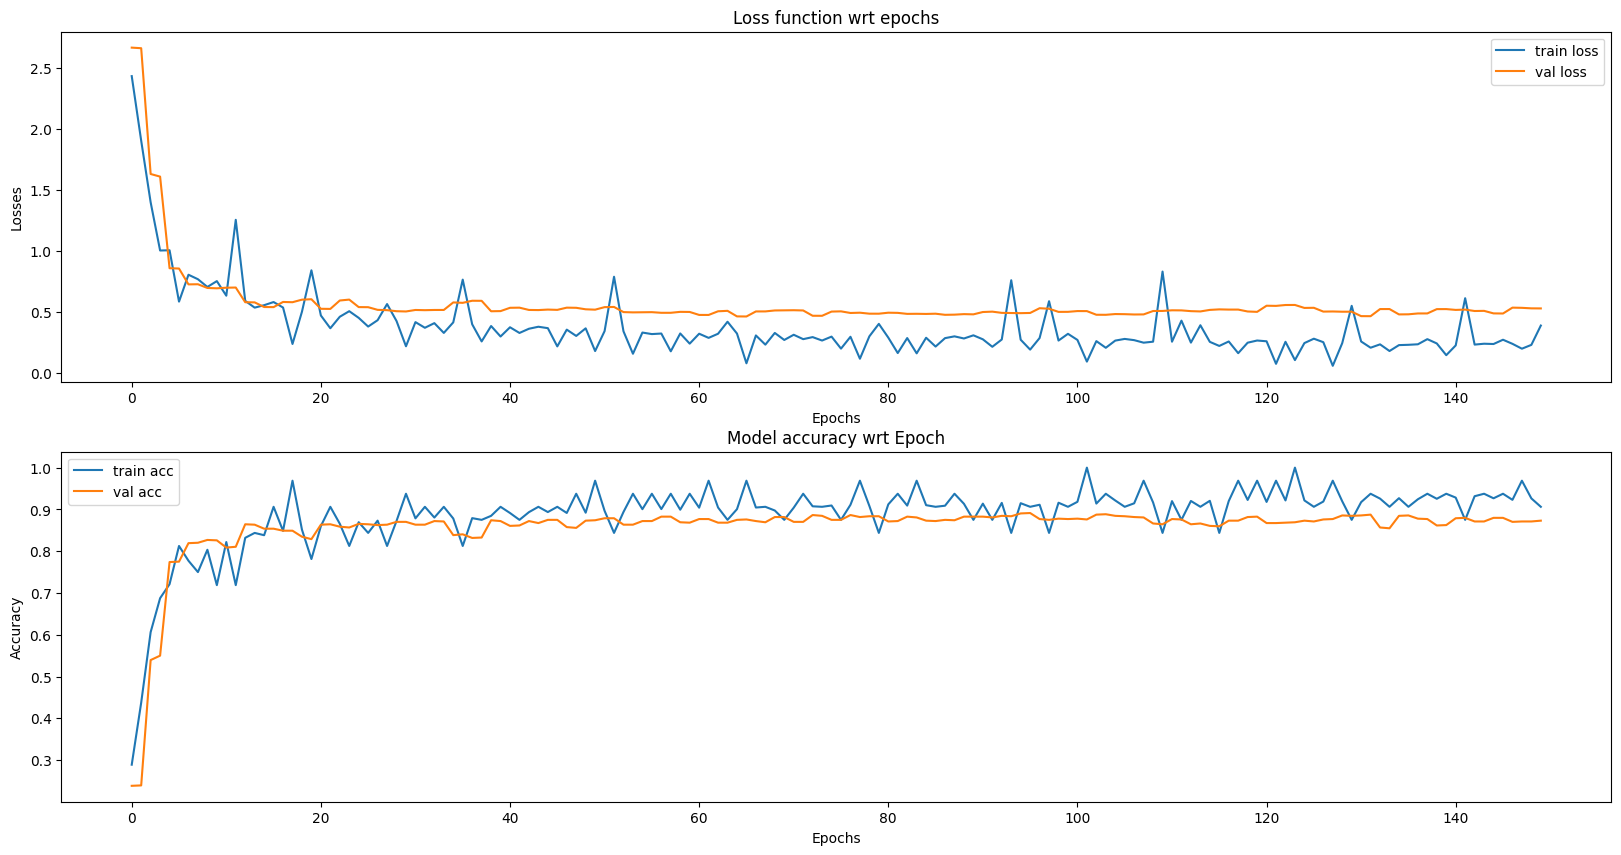

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [ ]:
from keras.models import load_model
model = load_model('./result_model.h5')

In [ ]:
pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [ ]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [ ]:
def get_demo (img_path) :
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    img = t_img(img)
    img = c_img(img)
    img = b_img(img)
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

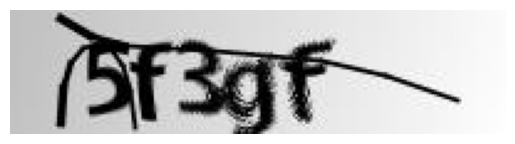

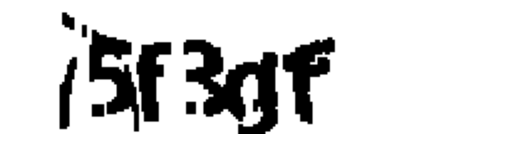

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
5
f
3
g
f
5f3gf.png


In [ ]:
get_demo('/kaggle/input/captcha-version-2-images/samples/samples/5f3gf.png')